<a href="https://colab.research.google.com/github/jothiovia-2004/project/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cognifyz Data Analysis Internship**

Level 1 Task 1(Top Cuisines)

In [66]:
import pandas as pd
df = pd.read_csv('data.csv')



In [67]:
print(df['Cuisines'].head())

0          French, Japanese, Desserts
1                            Japanese
2    Seafood, Asian, Filipino, Indian
3                     Japanese, Sushi
4                    Japanese, Korean
Name: Cuisines, dtype: object


In [68]:
df_clean = df['Cuisines'].dropna().str.split(', ')



In [69]:
from collections import Counter

all_cuisines = [cuisine for sublist in df_clean for cuisine in sublist]
cuisine_counts = Counter(all_cuisines)


In [70]:
top_3 = cuisine_counts.most_common(3)
print("Top 3 cuisines:", top_3)


Top 3 cuisines: [('North Indian', 3960), ('Chinese', 2735), ('Fast Food', 1986)]


In [71]:
total_restaurants = len(df)

percentages = {
    cuisine: (df['Cuisines'].dropna().str.contains(cuisine).sum() / total_restaurants) * 100
    for cuisine, _ in top_3
}



In [72]:
for cuisine, percent in percentages.items():
    print(f"{cuisine}: {percent:.2f}%")



North Indian: 41.46%
Chinese: 28.61%
Fast Food: 20.80%


Level 1 Task 2(City Analysis)

In [58]:
import pandas as pd

file_path = 'data.csv'
df = pd.read_csv(file_path)

In [59]:
print("Columns in the dataset:", df.columns)
df.columns = df.columns.str.strip()

Columns in the dataset: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [60]:
df = df.dropna(subset=['City', 'Aggregate rating'])

df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

df = df.dropna(subset=['Aggregate rating'])

In [61]:
df = df.dropna(subset=['City'])

In [62]:
import pandas as pd

file_path = 'data.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

print("Columns:", df.columns.tolist())


Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [63]:
city_counts = df['City'].value_counts()
city_most_restaurants = city_counts.idxmax()
print(f"\nCity with the highest number of restaurants: {city_most_restaurants} ({city_counts.max()} restaurants)")


City with the highest number of restaurants: New Delhi (5473 restaurants)


In [64]:
average_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage rating for restaurants in each city:")
print(average_ratings)


Average rating for restaurants in each city:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [65]:
city_highest_avg_rating = average_ratings.idxmax()
print(f"\nCity with the highest average restaurant rating: {city_highest_avg_rating} ({average_ratings.max():.2f})")


City with the highest average restaurant rating: Inner City (4.90)


Level 2 Task 1(Restaurant Ratings)

In [48]:
import pandas as pd
df = pd.read_csv('data.csv')



In [49]:
print(df[['Aggregate rating', 'Votes']].head())

   Aggregate rating  Votes
0               4.8    314
1               4.5    591
2               4.4    270
3               4.9    365
4               4.8    229


In [50]:
rating_bins = pd.cut(df['Aggregate rating'], bins=[0,1,2,3,4,5], right=False)
rating_distribution = rating_bins.value_counts().sort_index()

print("Rating distribution:")
print(rating_distribution)


Rating distribution:
Aggregate rating
[0, 1)    2148
[1, 2)       3
[2, 3)    1430
[3, 4)    4590
[4, 5)    1380
Name: count, dtype: int64


In [51]:
most_common_range = rating_distribution.idxmax()
print(f"Most common rating range: {most_common_range}")

Most common rating range: [3, 4)


In [52]:
average_votes = df['Votes'].mean()
print(f"Average number of votes: {average_votes:.2f}")


Average number of votes: 156.91


Level 2 Task 2(Cuisine Combination)

In [53]:
import pandas as pd
df = pd.read_csv('data.csv')
print(df[['Cuisines', 'Aggregate rating']].head())

                           Cuisines  Aggregate rating
0        French, Japanese, Desserts               4.8
1                          Japanese               4.5
2  Seafood, Asian, Filipino, Indian               4.4
3                   Japanese, Sushi               4.9
4                  Japanese, Korean               4.8


In [54]:
df_clean = df.dropna(subset=['Cuisines'])
df_clean['Cuisine_Combo'] = df_clean['Cuisines'].apply(
    lambda x: ', '.join(sorted([c.strip() for c in x.split(',')]))
)

/tmp/ipython-input-54-626285221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cuisine_Combo'] = df_clean['Cuisines'].apply(


In [55]:
combo_counts = df_clean['Cuisine_Combo'].value_counts()
top_combos = combo_counts.head(10)

print("Top 10 most common cuisine combinations:")
print(top_combos)

Top 10 most common cuisine combinations:
Cuisine_Combo
North Indian                      936
Chinese, North Indian             616
Mughlai, North Indian             394
Fast Food                         354
Chinese                           354
Chinese, Mughlai, North Indian    306
Cafe                              299
Bakery                            218
Bakery, Desserts                  181
Chinese, Fast Food                159
Name: count, dtype: int64


In [56]:
combo_ratings = df_clean.groupby('Cuisine_Combo')['Aggregate rating'].mean()

combo_summary = pd.DataFrame({
    'Count': combo_counts,
    'Average Rating': combo_ratings
}).dropna()


In [57]:
combo_summary_filtered = combo_summary[combo_summary['Count'] >= 10]
sorted_combos = combo_summary_filtered.sort_values(by='Average Rating', ascending=False)

print("Top cuisine combinations by average rating (min 10 restaurants):")
print(sorted_combos.head(10))


Top cuisine combinations by average rating (min 10 restaurants):
                            Count  Average Rating
Cuisine_Combo                                    
Modern Indian                  11        4.345455
Indian                         18        4.250000
Seafood                        14        4.114286
Cafe, Continental, Italian     18        4.111111
Thai                           16        4.100000
American, Burger               16        4.068750
Japanese, Sushi                20        4.060000
Bakery, Cafe, Desserts         11        4.027273
Asian, Chinese, Thai           19        3.773684
Chinese, Japanese, Thai        11        3.672727


Level 2 Task 3(Geographic Analysis)

In [44]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [45]:
df = pd.read_csv('data.csv')

df = df.dropna(subset=['Latitude', 'Longitude'])


In [46]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(restaurant_map)

for i, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row.get('Restaurant Name', ''),
    ).add_to(marker_cluster)

restaurant_map.save('restaurant_map.html')



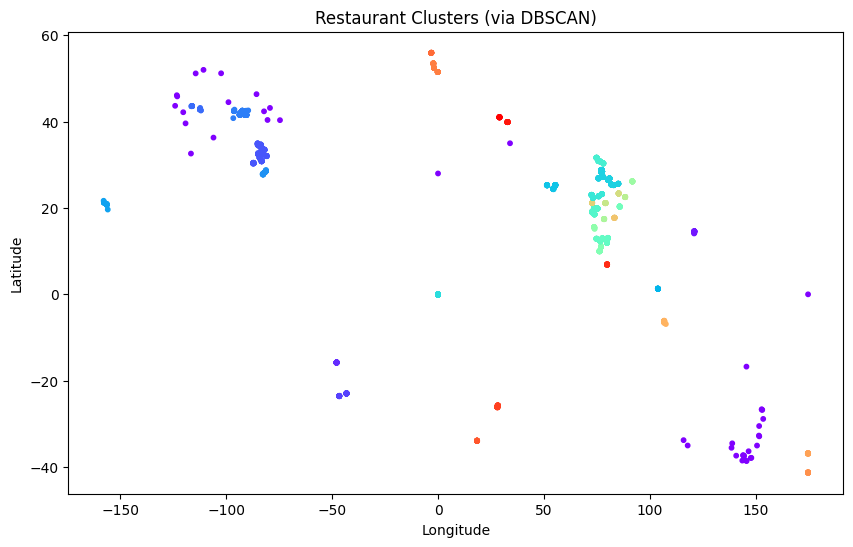

In [47]:
from sklearn.preprocessing import StandardScaler

coords = df[['Latitude', 'Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

db = DBSCAN(eps=0.1, min_samples=10).fit(coords_scaled)
df['Cluster'] = db.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='rainbow', s=10)
plt.title("Restaurant Clusters (via DBSCAN)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Level 2 Task 4(Restaurant Chain Analysis)

In [40]:
import pandas as pd

df = pd.read_csv('data.csv')

df[['Restaurant Name', 'Aggregate rating', 'Votes']].head()



,Restaurant Name,Aggregate rating,Votes
0,Le Petit Souffle,4.8,314
1,Izakaya Kikufuji,4.5,591
2,Heat - Edsa Shangri-La,4.4,270
3,Ooma,4.9,365
4,Sambo Kojin,4.8,229


In [41]:
name_counts = df['Restaurant Name'].value_counts()

chain_names = name_counts[name_counts > 1]
print("Likely restaurant chains:\n", chain_names.head(10))


Likely restaurant chains:
 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [42]:
chains_df = df[df['Restaurant Name'].isin(chain_names.index)]

chain_stats = chains_df.groupby('Restaurant Name').agg(
    Branches=('Restaurant Name', 'count'),
    Avg_Rating=('Aggregate rating', 'mean'),
    Avg_Votes=('Votes', 'mean')
).sort_values(by='Branches', ascending=False)

print("Top chains by number of branches:\n", chain_stats.head(10))


Top chains by number of branches:
                   Branches  Avg_Rating    Avg_Votes
Restaurant Name                                    
Cafe Coffee Day         83    2.419277    29.253012
Domino's Pizza          79    2.740506    84.088608
Subway                  63    2.907937    97.206349
Green Chick Chop        51    2.672549    18.901961
McDonald's              48    3.339583   110.229167
Keventers               34    2.870588    37.147059
Pizza Hut               30    3.320000   165.366667
Giani                   29    2.689655    29.448276
Baskin Robbins          28    1.860714    15.285714
Barbeque Nation         26    4.353846  1082.384615


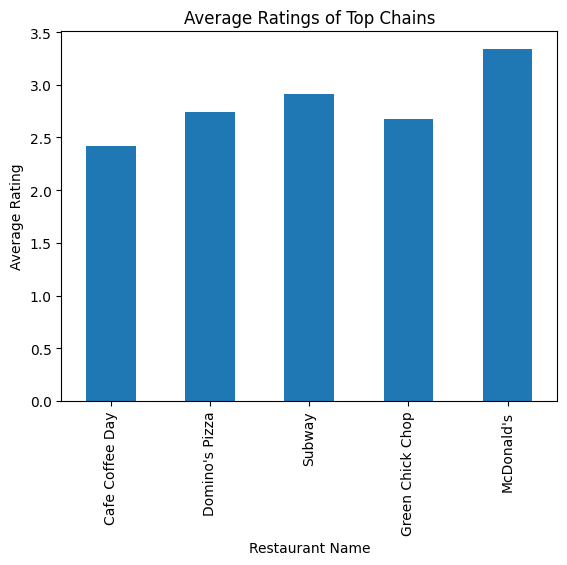

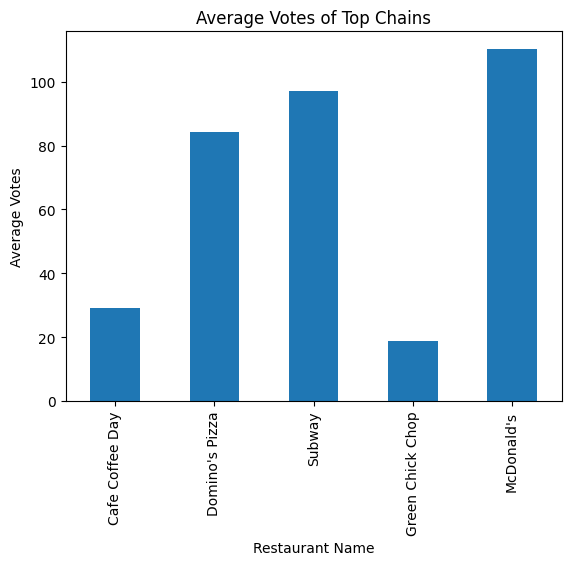

In [43]:
import matplotlib.pyplot as plt

top_chains = chain_stats.head(5)

top_chains[['Avg_Rating']].plot(kind='bar', title='Average Ratings of Top Chains', legend=False)
plt.ylabel('Average Rating')
plt.show()

top_chains[['Avg_Votes']].plot(kind='bar', title='Average Votes of Top Chains', legend=False)
plt.ylabel('Average Votes')
plt.show()


Level 3 Task 1(Restaurant Reviews)

In [35]:
df = pd.read_csv('data.csv')

df = df.dropna(subset=['Rating text'])


In [36]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = re.sub(r'[^\w\s]', '', text.lower())

    return [word for word in word_tokenize(text) if word not in stop_words and word.isalpha()]

df['tokens'] = df['Rating text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [37]:
positive_reviews = df[df['Aggregate rating'] >= 4]['tokens']
negative_reviews = df[df['Aggregate rating'] < 3]['tokens']

positive_words = Counter([word for tokens in positive_reviews for word in tokens])
negative_words = Counter([word for tokens in negative_reviews for word in tokens])

print("Top Positive Keywords:", positive_words.most_common(10))
print("Top Negative Keywords:", negative_words.most_common(10))


Top Positive Keywords: [('good', 1079), ('excellent', 301)]
Top Negative Keywords: [('rated', 2148), ('average', 1247), ('poor', 186)]


In [38]:

df['review_length'] = df['tokens'].apply(len)

avg_length = df['review_length'].mean()
print(f"Average review length: {avg_length:.2f} words")



Average review length: 1.00 words


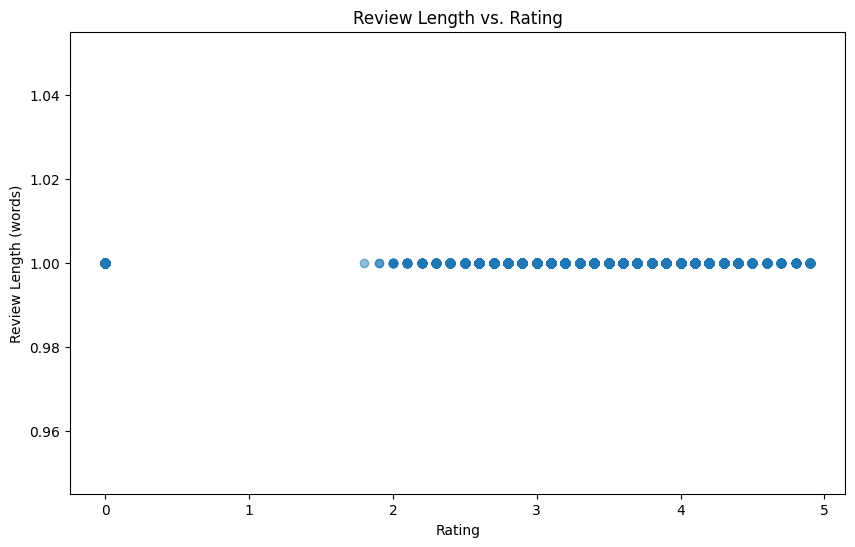

Correlation between review length and rating: nan


In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Aggregate rating'], df['review_length'], alpha=0.5)
plt.title("Review Length vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length (words)")
plt.show()

correlation = df[['Aggregate rating', 'review_length']].corr().iloc[0, 1]
print(f"Correlation between review length and rating: {correlation:.2f}")



Level 3 Task 2 (Votes Analysis)

In [31]:
df = pd.read_csv('data.csv')

df[['Restaurant Name', 'Votes', 'Aggregate rating']].head()


,Restaurant Name,Votes,Aggregate rating
0,Le Petit Souffle,314,4.8
1,Izakaya Kikufuji,591,4.5
2,Heat - Edsa Shangri-La,270,4.4
3,Ooma,365,4.9
4,Sambo Kojin,229,4.8


In [32]:
most_votes = df.sort_values(by='Votes', ascending=False).head(5)
least_votes = df[df['Votes'] > 0].sort_values(by='Votes').head(5)

print("Top 5 Most Voted Restaurants:\n", most_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])
print("\nTop 5 Least Voted Restaurants:\n", least_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])



Top 5 Most Voted Restaurants:
                 Restaurant Name  Votes  Aggregate rating
728                        Toit  10934               4.8
735                    Truffles   9667               4.7
3994           Hauz Khas Social   7931               4.3
2412                  Peter Cat   7574               4.3
739   AB's - Absolute Barbecues   6907               4.6

Top 5 Least Voted Restaurants:
              Restaurant Name  Votes  Aggregate rating
58     Quiosque Chopp Brahma      1               0.0
4362  Amul Ice-Cream Parlour      1               0.0
8527       Shri Adarsh Kulfi      1               0.0
8528            Simla Bakery      1               0.0
7802              Cafe Youth      1               0.0


In [33]:
df_clean = df[['Votes', 'Aggregate rating']].dropna()

correlation = df_clean['Votes'].corr(df_clean['Aggregate rating'])
print(f"\nCorrelation between votes and rating: {correlation:.2f}")



Correlation between votes and rating: 0.31


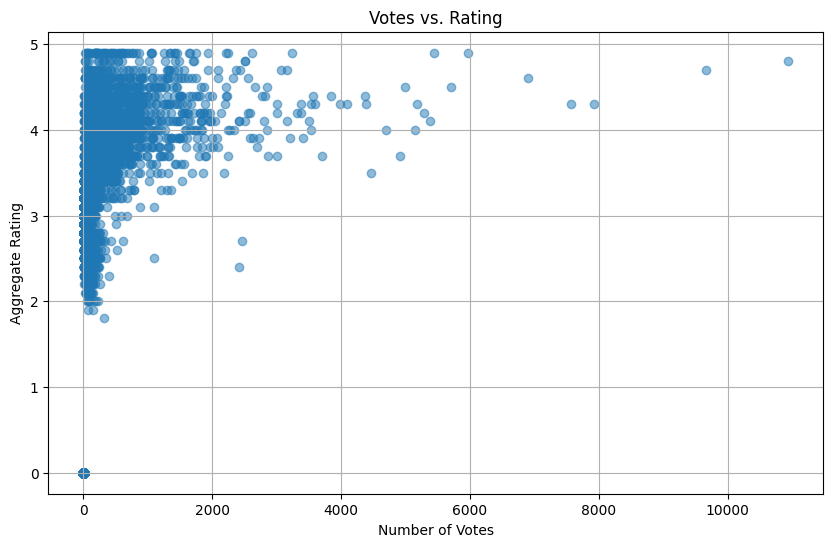

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Votes'], df_clean['Aggregate rating'], alpha=0.5)
plt.title("Votes vs. Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.show()

Level 3 Task 3(Price Range vs. Online Delivery andTable Booking)

In [26]:
import pandas as pd

df = pd.read_csv('data.csv')


df[['Price range', 'Has Online delivery', 'Has Table booking']].head()



,Price range,Has Online delivery,Has Table booking
0,3,No,Yes
1,3,No,Yes
2,4,No,Yes
3,4,No,No
4,4,No,Yes


In [27]:
df['Has Online delivery'] = df['Has Online delivery'].str.lower() == 'yes'
df['Has Table booking'] = df['Has Table booking'].str.lower() == 'yes'

In [28]:
summary = df.groupby('Price range').agg(
    Total=('Has Online delivery', 'count'),
    Online_Delivery=('Has Online delivery', 'sum'),
    Table_Booking=('Has Table booking', 'sum')
)


summary['% Online Delivery'] = (summary['Online_Delivery'] / summary['Total']) * 100
summary['% Table Booking'] = (summary['Table_Booking'] / summary['Total']) * 100

print(summary[['% Online Delivery', '% Table Booking']])

             % Online Delivery  % Table Booking
Price range                                    
1                    15.774077         0.022502
2                    41.310633         7.677482
3                    29.190341        45.738636
4                     9.044369        46.757679


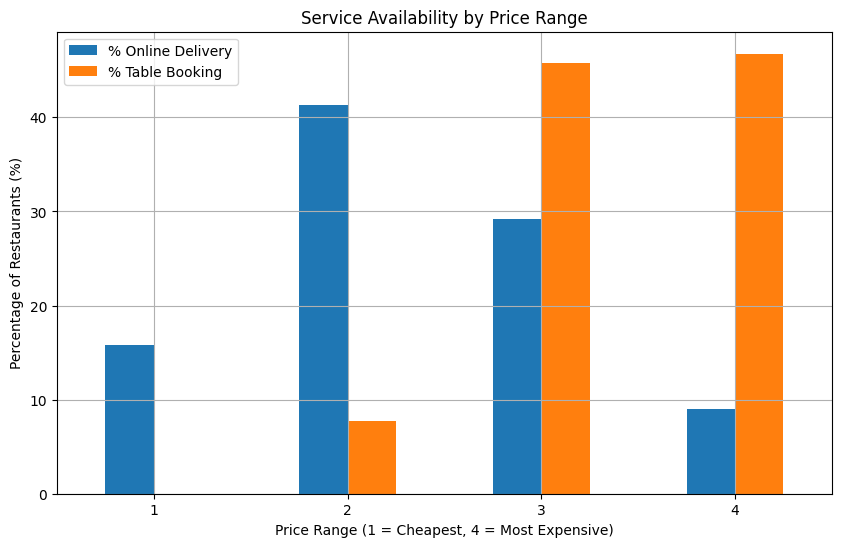

In [29]:
import matplotlib.pyplot as plt

summary[['% Online Delivery', '% Table Booking']].plot(kind='bar', figsize=(10,6))
plt.title('Service Availability by Price Range')
plt.ylabel('Percentage of Restaurants (%)')
plt.xlabel('Price Range (1 = Cheapest, 4 = Most Expensive)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Level 1 Task 3(Price Range Distribution)

Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


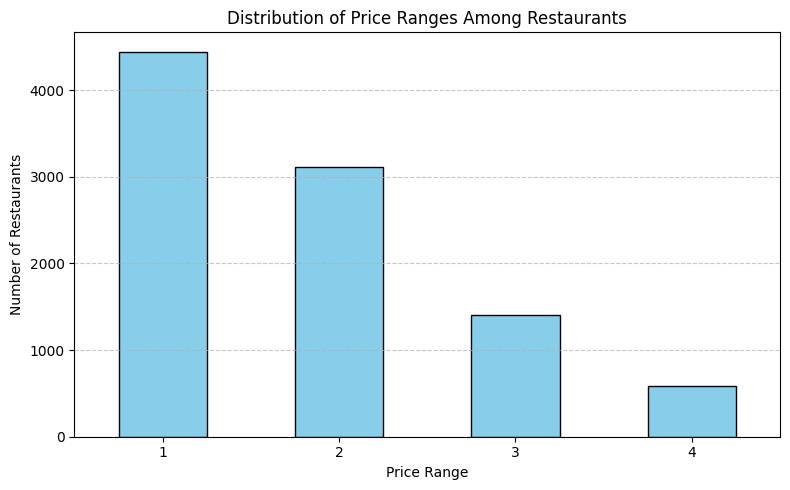


Percentage of restaurants in each price range:
Price range
1    46.53%
2    32.59%
3    14.74%
4     6.14%
Name: count, dtype: object


In [25]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'data.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())

df_price = df.dropna(subset=['Price range'])
price_counts = df_price['Price range'].value_counts().sort_index()


price_percentages = (price_counts / price_counts.sum()) * 100


plt.figure(figsize=(8, 5))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nPercentage of restaurants in each price range:")
print(price_percentages.round(2).astype(str) + '%')


Level ! Task 4(Online Delivery)

In [24]:
import pandas as pd


file_path = 'data.csv'
df = pd.read_csv(file_path)


df.columns = df.columns.str.strip()


print("Columns:", df.columns.tolist())


online_delivery_counts = df['Has Online delivery'].value_counts(dropna=False)


total_restaurants = len(df)
online_delivery_yes = online_delivery_counts.get('Yes', 0)
online_delivery_percentage = (online_delivery_yes / total_restaurants) * 100

print(f"\nPercentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")


df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df = df.dropna(subset=['Aggregate rating', 'Has Online delivery'])


avg_ratings = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("\nAverage ratings by Online Delivery option:")
print(avg_ratings.round(2))


Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

Percentage of restaurants that offer online delivery: 25.66%

Average ratings by Online Delivery option:
Has Online delivery
No     2.47
Yes    3.25
Name: Aggregate rating, dtype: float64
